<a href="https://colab.research.google.com/github/Near-o7/Challenge-ONE-Data-Science-Telecom-X-parte-2/blob/main/Data_Science_Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extraer datos

In [18]:
import pandas as pd

dataset_url = 'https://raw.githubusercontent.com/Near-o7/Challenge-ONE-Data-Science-Telecom-X-parte-2/refs/heads/main/datos_tratados.csv'
df = pd.read_csv(dataset_url)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.daily
0,0002-ORFBO,Permanece en la empresa,Female,No es adulto mayor,Tiene pareja,Tiene dependientes,9,Con servicio telefónico,No,DSL,...,No,Yes,Yes,No,One year,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,Permanece en la empresa,Male,No es adulto mayor,No tiene pareja,No tiene dependientes,9,Con servicio telefónico,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Abandonó la empresa,Male,No es adulto mayor,No tiene pareja,No tiene dependientes,4,Con servicio telefónico,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Abandonó la empresa,Male,Adulto mayor,Tiene pareja,No tiene dependientes,13,Con servicio telefónico,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Abandonó la empresa,Female,Adulto mayor,Tiene pareja,No tiene dependientes,3,Con servicio telefónico,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Sí,Mailed check,83.9,267.40,2.796667


## Eliminar columnas reduntantes

In [19]:
cols_to_drop = ['customerID']
cols_to_drop.append('Charges.daily')

df = df.drop(columns=cols_to_drop)
print("Columnas eliminadas:", cols_to_drop)

df.head()

Columnas eliminadas: ['customerID', 'Charges.daily']


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,Permanece en la empresa,Female,No es adulto mayor,Tiene pareja,Tiene dependientes,9,Con servicio telefónico,No,DSL,No,Yes,No,Yes,Yes,No,One year,Sí,Mailed check,65.6,593.30
1,Permanece en la empresa,Male,No es adulto mayor,No tiene pareja,No tiene dependientes,9,Con servicio telefónico,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Abandonó la empresa,Male,No es adulto mayor,No tiene pareja,No tiene dependientes,4,Con servicio telefónico,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,Abandonó la empresa,Male,Adulto mayor,Tiene pareja,No tiene dependientes,13,Con servicio telefónico,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Sí,Electronic check,98.0,1237.85
4,Abandonó la empresa,Female,Adulto mayor,Tiene pareja,No tiene dependientes,3,Con servicio telefónico,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Sí,Mailed check,83.9,267.40


##Agrupar columnas

In [20]:
cols_to_group = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in cols_to_group:
    df[col] = df[col].replace('No internet service', 'No')

print("### Datos después de agrupar categorías de internet ###")
print(df[['InternetService', 'OnlineSecurity']].head())
print("-" * 50)

### Datos después de agrupar categorías de internet ###
  InternetService OnlineSecurity
0             DSL             No
1             DSL             No
2     Fiber optic             No
3     Fiber optic             No
4     Fiber optic             No
--------------------------------------------------


##Codificar Variables

In [21]:
df['Churn'] = df['Churn'].map({
    'Permanece en la empresa': 0,
    'Abandonó la empresa': 1
})

df.replace({'Sí': 1, 'No': 0}, inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("### Datos Codificados (transformados a números) ###")
print(df_encoded.head())
print("-" * 50)

### Datos Codificados (transformados a números) ###
   Churn  tenure  PaperlessBilling  Charges.Monthly  Charges.Total  \
0      0       9                 1             65.6         593.30   
1      0       9                 0             59.9         542.40   
2      1       4                 1             73.9         280.85   
3      1      13                 1             98.0        1237.85   
4      1       3                 1             83.9         267.40   

   gender_Male  SeniorCitizen_No es adulto mayor  Partner_Tiene pareja  \
0        False                              True                  True   
1         True                              True                 False   
2         True                              True                 False   
3         True                             False                  True   
4        False                             False                  True   

   Dependents_Tiene dependientes  PhoneService_Sin servicio telefónico  ...  \
0  

/tmp/ipython-input-1910184550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sí': 1, 'No': 0}, inplace=True)


##Verificación de la proporción

In [22]:
churn_distribution = df_encoded['Churn'].value_counts(normalize=True)

class_labels = {
    0: 'Permanece en la empresa',
    1: 'Abandonó la empresa'
}

print("Distribución de clases en 'Churn':\n")
for value, proportion in churn_distribution.items():
    label = class_labels.get(value, 'Desconocido')
    percentage = round(proportion * 100, 2)
    print(f"{label} (Churn = {value}): {percentage}%")

Distribución de clases en 'Churn':

Permanece en la empresa (Churn = 0): 73.46%
Abandonó la empresa (Churn = 1): 26.54%


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd


X_for_vif = df_encoded.drop(columns=['Churn'])
# Convert boolean columns to integers (0s and 1s)
for col in X_for_vif.select_dtypes(include='bool').columns:
    X_for_vif[col] = X_for_vif[col].astype(int)

# Replace any potential non-finite values with 0 before VIF calculation
X_for_vif = X_for_vif.replace([np.inf, -np.inf], np.nan).fillna(0)


X_for_vif['const'] = 1


while True:
    vif = pd.DataFrame()
    vif["feature"] = X_for_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

    max_vif = vif[vif['feature'] != 'const']['VIF'].max()

    if max_vif > 10:
        feature_to_drop = vif.sort_values('VIF', ascending=False)['feature'].iloc[0]
        print(f"Eliminando '{feature_to_drop}' con VIF de {max_vif:.2f}")
        X_for_vif = X_for_vif.drop(columns=[feature_to_drop])
    else:
        print("Todos los VIFs están por debajo de 10. Proceso finalizado.")
        break

X_final_features = X_for_vif # Removed the extra drop of 'const'
y = df_encoded['Churn']

print("\n### Variables finales después del análisis VIF ###")
print(X_final_features.columns)
print("-" * 50)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'PhoneService_Sin servicio telefónico' con VIF de inf
Eliminando 'Charges.Monthly' con VIF de 865.07
Eliminando 'const' con VIF de 10.65
Eliminando 'Charges.Total' con VIF de 18.75
Todos los VIFs están por debajo de 10. Proceso finalizado.

### Variables finales después del análisis VIF ###
Index(['tenure', 'PaperlessBilling', 'gender_Male',
       'SeniorCitizen_No es adulto mayor', 'Partner_Tiene pareja',
       'Dependents_Tiene dependientes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
--------------------------------------------------


## Preparación para el Modelo

## Balanceo de clases con SMOTE

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final_features, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Distribución antes de SMOTE: \n{y_train.value_counts(normalize=True)}")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
print(f"\nDistribución después de SMOTE: \n{y_train_bal.value_counts(normalize=True)}")
print("-" * 50)

print("✅ ¡El preprocesamiento está completo y los datos están listos para el modelado!")

Distribución antes de SMOTE: 
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Distribución después de SMOTE: 
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
--------------------------------------------------
✅ ¡El preprocesamiento está completo y los datos están listos para el modelado!


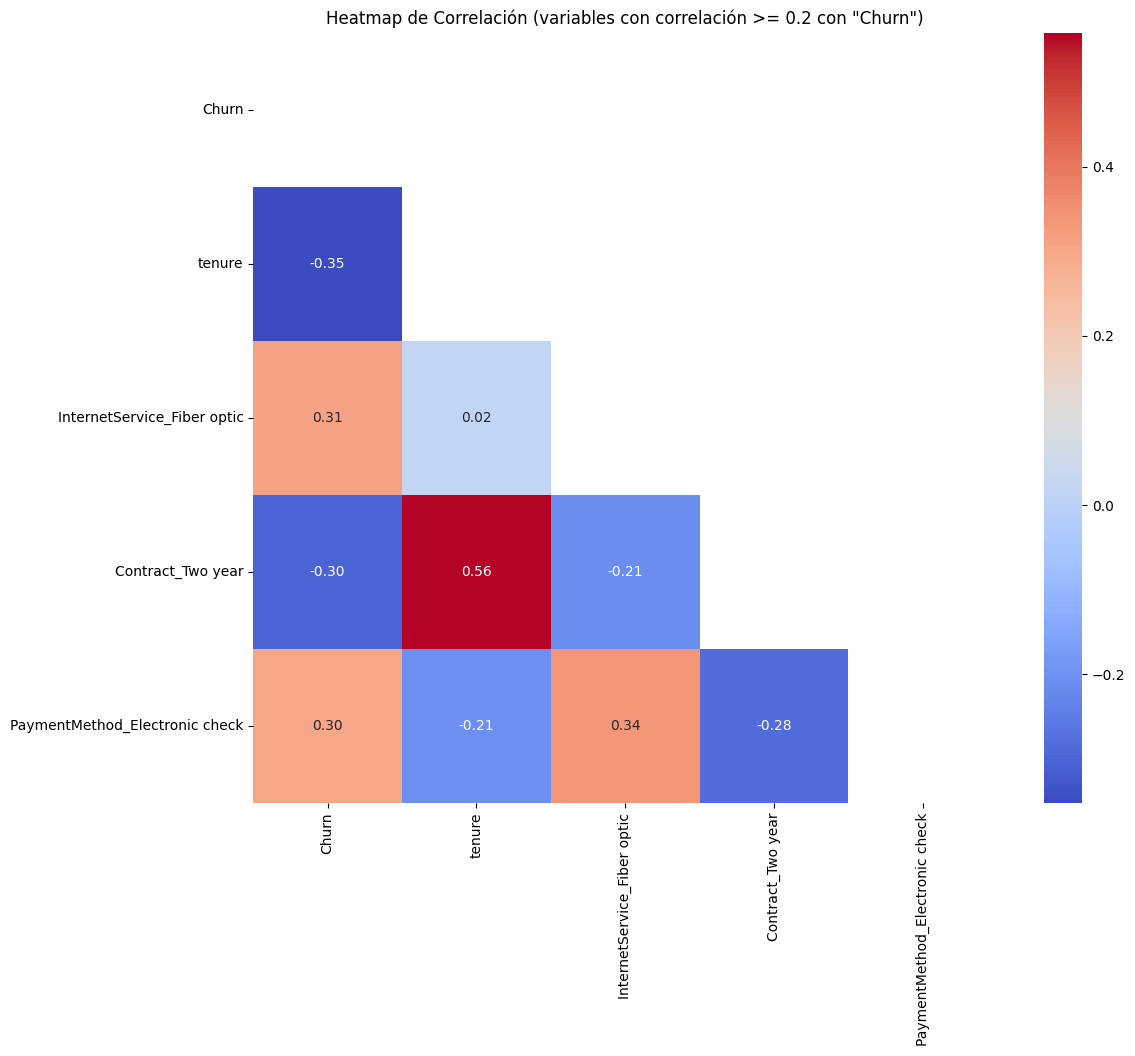

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'df_encoded' es tu dataframe después de la codificación
corr = df_encoded.corr()
target_var = 'Churn' # Asegúrate que tu columna objetivo se llame así

# Filtrar variables con correlación >= 0.2 (o el umbral que elijas)
relevant_vars = corr.index[abs(corr[target_var]) >= 0.2].tolist()
corr_filtered = corr.loc[relevant_vars, relevant_vars]

# Crear una máscara para visualizar mejor
mask = np.triu(np.ones_like(corr_filtered, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtered,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    mask=mask
)
plt.title(f'Heatmap de Correlación (variables con correlación >= 0.2 con "{target_var}")')
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# --- Modelo 1: Regresión Logística ---
print("### Regresión Logística ###")
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("-" * 50)

# --- Modelo 2: Random Forest ---
print("### Random Forest ###")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

### Regresión Logística ###
Accuracy: 0.7520113582584004
ROC AUC: 0.8376874414245549
Matriz de Confusión:
 [[1151  401]
 [ 123  438]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1552
           1       0.52      0.78      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

--------------------------------------------------
### Random Forest ###
Accuracy: 0.7619498343587316
ROC AUC: 0.8029246375213629
Matriz de Confusión:
 [[1306  246]
 [ 257  304]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1552
           1       0.55      0.54      0.55       561

    accuracy                           0.76      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



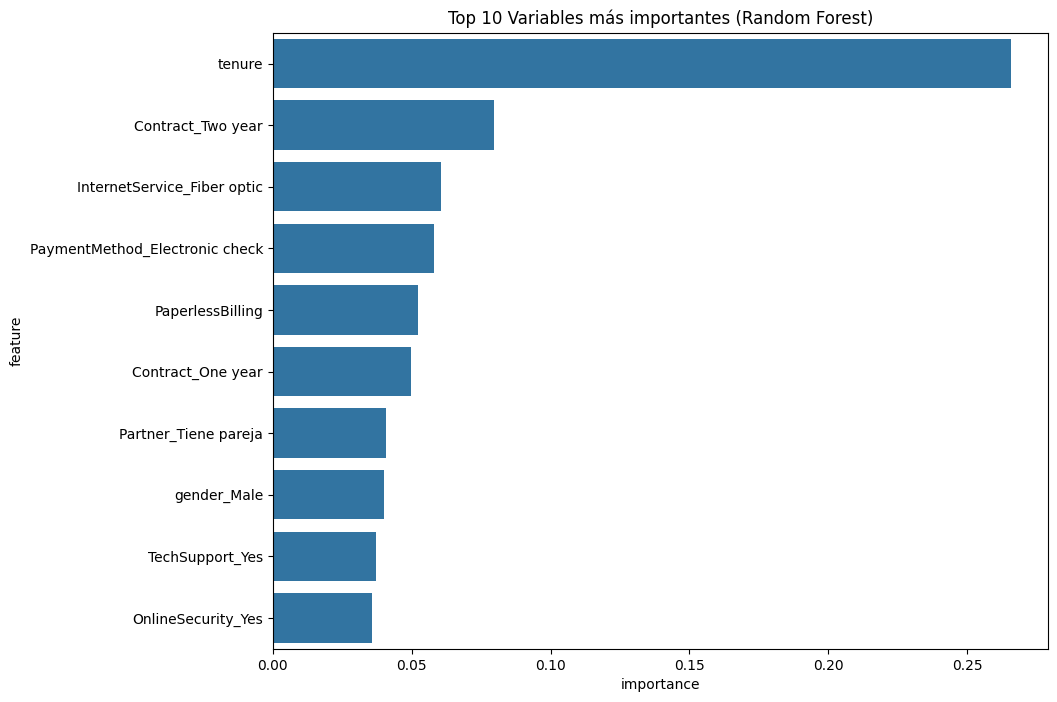

In [34]:
importances = rf.feature_importances_
feature_names = X_final_features.columns

# Crear un DataFrame para visualizar mejor
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10)) # Top 10
plt.title('Top 10 Variables más importantes (Random Forest)')
plt.show()